# DS1801 Project: Sentiment Analysis

## Part 1: Naive Bayes

### Pipeline

<img src="pipeline.png" width="800px">

* N-gram (extract n words)
* bag of word (extract single word)


### Get Familiar with dataset

In [2]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/heyunyu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/heyunyu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Load csv file into DataFrame
#train = pd.read_csv('train.csv')
train = pd.read_csv('/Users/heyunyu/Desktop/DAL/NLP/senti_amazon.csv')

In [4]:
# information of data
train?

In [5]:
# new dataset
train=train.rename(columns={'target':'sentiment'}) 

In [6]:
print("sentiment  :", train.sentiment[0])
print("reviewText :", train.reviewText[0])
# sentiment is target

sentiment  : 0.0
reviewText : Installing the game was a struggle (because of games for windows live bugs).Some championship races and cars can only be "unlocked" by buying them as an addon to the game. I paid nearly 30 dollars when the game was new. I don't like the idea that I have to keep paying to keep playing.I noticed no improvement in the physics or graphics compared to Dirt 2.I tossed it in the garbage and vowed never to buy another codemasters game. I'm really tired of arcade style rally/racing games anyway.I'll continue to get my fix from Richard Burns Rally, and you should to. :)http://www.amazon.com/Richard-Burns-Rally-PC/dp/B000C97156/ref=sr_1_1?ie=UTF8&qid;=1341886844&sr;=8-1&keywords;=richard+burns+rallyThank you for reading my review! If you enjoyed it, be sure to rate it as helpful.


In [7]:
train.shape

(203505, 2)

In [8]:
# Get a sample (head) of the data frame
train.head()
## train.sample(2) #randomly select n samples

,reviewText,sentiment
0,Installing the game was a struggle (because of...,0.0
1,If you like rally cars get this game you will ...,1.0
2,1st shipment received a book instead of the ga...,0.0
3,I had Dirt 2 on Xbox 360 and it was an okay ga...,1.0
4,"Overall this is a well done racing game, with ...",1.0


In [9]:
# Statics on tags
train.sentiment.value_counts()
## balanced dataset

1.0    174989
0.0     28516
Name: sentiment, dtype: int64

See [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/10min.html?highlight=data%20frame) for more details.

### Load Data

In [10]:
def load_data(path):
    data = pd.read_csv(path)
    x = data['reviewText'].tolist()
    y = data['sentiment'].tolist()
    return x, y

In [11]:
train.shape[0]/2

101752.5

In [12]:
test=train.iloc[101753:,:]
train=train.iloc[:101753,:]
train.shape, test.shape

((101753, 2), (101752, 2))

In [13]:
train.to_csv('amazon_train.csv',index=False)
test.to_csv('amazon_test.csv',index=False)

In [14]:
# train_x, train_y = load_data('train.csv')
# test_x, test_y = load_data('test.csv')
train_x, train_y = load_data('amazon_train.csv')
test_x, test_y = load_data('amazon_test.csv')

In [15]:
print('training size:', len(train_x))
print('test size:', len(test_x))

training size: 101753
test size: 101752


### Preprocessing

In [16]:
lemmatizer = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english') ## (the, an, a...)high frequency but no meanings
transtbl = str.maketrans(string.punctuation, ' ' * len(string.punctuation)) # map into blank

In [17]:
print(stopwords)
## keep part of words in stopwords --> more precise manipulation

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
'ababc'.translate(str.maketrans('abc','def'))

'dedef'

In [20]:
def preprocessing(line):
    line = line.replace('<br />', '')   # Remove html tag (<br />)
    line = line.translate(transtbl)     # Remove punctuation
    
    # Get tokens
    tokens = []
    for t in nltk.word_tokenize(line): ## word_tokenize()-->could be a self-defined model
        t = t.lower()
        if t not in stopwords:
            lemma = lemmatizer.lemmatize(t, 'v') ## only consider 'v' and 'noun'///self-defined more precise model
            tokens.append(lemma)
            
    return ' '.join(tokens)

In [21]:
# Yet a more compact way to write the code
def preprocessing(line: str) -> str:
    line = line.replace('<br />', '').translate(transtbl)
    
    tokens = [lemmatizer.lemmatize(t.lower(),'v')  # What to put in the list
              for t in nltk.word_tokenize(line)    # Where 
              if t.lower() not in stopwords]       # If
    
    return ' '.join(tokens)

In [22]:
test_str = "I bought several books yesterday<br /> and I really love them!"
preprocessing(test_str)

'buy several book yesterday really love'

In [23]:
nltk.download() ## update periodly (with yellow highlight)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [24]:
str(train_x[100])

'These awesome-sauce things make any GC controller as far extended as a wavebird. Given these days any games I have time to play are all via the Wii anyway, having the extra length for GC controllers is great.'

In [25]:
# Preprocess all data
train_x = [preprocessing(str(x)) for x in train_x]
test_x = [preprocessing(str(x)) for x in test_x]

In [26]:
# Yet a more modern way to write code
train_x = list(map(preprocessing, train_x))
test_x = list(map(preprocessing, test_x))

In [27]:
from nbmultitask import ThreadWithLogAndControls
from time import sleep

def preprocess_dataset(thread_print, datas, output):
    """
    Preprocess dataset in the background thread, so that
    it won't block the notebook from running other code snippets.
    Do not update output anywhere outside this background thread.

    Args:
        thread_print: for printing in nbmultitask, necessary
        datas: dict containing all datasets to be processed
        output: shared variable for storing output
    """
    
    sleep(0.5) # For consistent output format
    
    for name, data in datas.items():
        output[name] = []
        thread_print("\nPreprocessing " + name)
        
        m = len(data) / 4 # print progress every 25%
        for i, x in enumerate(data):
            output[name].append(preprocessing(x))
            if (i + 1) % m == 0:
                thread_print("Processed: %d%%" % ((i + 1) / m * 25))
        thread_print("Done.")
    
    thread_print("All done.")

In [28]:
# dict to store output
out = {}

In [29]:
def multitask_wrapper(thread_print):
    preprocess_dataset(thread_print, {"Training data": train_x, "Testing data": test_x}, out)

In [30]:
task = ThreadWithLogAndControls(target=multitask_wrapper, name="Preprocessing Data")
task.control_panel()

Button(button_style='success', description='start', style=ButtonStyle())

Button(button_style='primary', description='watch', style=ButtonStyle())

Button(description='clear log', style=ButtonStyle())

Output()

In [31]:
train_x = out['Training data']
test_x = out['Testing data']

### Some modern functions to introduce
- map
- reduce
- filter

They are very useful when running the project on a cluster or distributed compute system like Hadoop or Spark.

In [32]:
# Some useful modern functions
l = [0,1,2,3,4,5,6,7,8,9]

# Map
def square(x: int) -> int:
    return x * x

print( list(map(square, l)) ) ## 不改变数据的维度，对每个数据做处理

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [33]:
# Using lambda function
print( list(map(lambda x: x * x, l)) )

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [34]:
# Reduce
# reduce function is moved to functools
def add(x: int, y: int) -> int:
    return x + y

import functools
rst = functools.reduce(add, l) ## 压缩维度

print ("reduce", l, "by add:", rst)

reduce [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] by add: 45


In [35]:
# Using lambda function
# reduce is moved to functools in Python 3
rst = functools.reduce(lambda x, y: x + y, l)
print ("reduce", l, "by add:", rst)

reduce [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] by add: 45


In [36]:
rst = functools.reduce(lambda x, y: min(x, y), l)
print ("reduce", l, "by min:", rst)

reduce [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] by min: 0


In [37]:
# Filter
# Much faster than loop, similar with list comprehension
list(filter(lambda x: x < 5, l))

[0, 1, 2, 3, 4]

### Build Vocabulary

In [32]:
# Push all tokens and compute frequency of words
all_words = []
for line in train_x:
    words = line.split()
    for w in words:
        all_words.append(w)
        
voca = nltk.FreqDist(all_words) ## FreDist() --> map frequency of each word of word table

In [33]:
# Yet another more python-y style
all_words = [w for line in train_x for w in line.split()]
voca = nltk.FreqDist(all_words)

In [34]:
print(voca) ## unique word: 65081/ outcomes: total frequency

<FreqDist with 127443 samples and 11021874 outcomes>


In [35]:
voca.most_common(10) ## words with top words (extending: popular topics for visualization)

[('game', 482036),
 ('play', 141069),
 ('get', 121571),
 ('like', 106084),
 ('one', 92746),
 ('time', 76060),
 ('make', 67124),
 ('good', 60343),
 ('great', 57360),
 ('fun', 56473)]

In [36]:
topwords = [fpair[0] for fpair in list(voca.most_common(10000))]

### Vectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
cnt_vec = CountVectorizer()
cnt_vec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [39]:
# Create our BAG of words (specify words we care about)
cnt_vec.fit(topwords)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

#### Tf–idf term weighting

- Tf: term-frequency
- idf: inverse document-frequency
- Tf-idf = $tf(t,d) \times idf(t)$

$$
idf(t) = log{\frac{1 + n_d}{1 + df(d, t)}} + 1
$$

![](http://www.onemathematicalcat.org/Math/Algebra_II_obj/Graphics/log_base_gt1.gif)

> Sentence 1: The boy **love** the toy

> Sentence 2: The boy **hate** the toy

In [40]:
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [41]:
counts = [[3, 0, 1],
          [2, 0, 0],
          [3, 0, 0],
          [4, 0, 0],
          [3, 2, 0],
          [3, 0, 2]]
tfidf = transformer.fit_transform(counts)
tfidf

<6x3 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [42]:
tfidf.toarray()

array([[0.81940995, 0.        , 0.57320793],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.47330339, 0.88089948, 0.        ],
       [0.58149261, 0.        , 0.81355169]])

<span style="color:red">**Tips:**</span>

tf-idfs are computed slightly different in sklearn, where:

$$
idf(t) = log{\frac{n_d}{1 + df(d, t)}}
$$

With `smooth_idf=True` set to `True`, the formula is:

$$
idf(t) = log{\frac{n_d}{df(d, t)}} + 1
$$

In [43]:
# Since CountVectorizer and TfidTransformer are often used together
# There is a class named TfidfVectorizer that combine these two steps
tf_vec = TfidfVectorizer()
tf_vec.fit(topwords)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [44]:
t_corpus = ['the boy love the toy', 'the boy hate the toy'] # Voc = ['boy', 'hate', 'love', 'the', 'toy']
t_cnt_vec = CountVectorizer()
t_cnt_vec.fit(' '.join(t_corpus).split())
t_cnt_vec.transform(t_corpus).toarray()

array([[1, 0, 1, 2, 1],
       [1, 1, 0, 2, 1]])

In [45]:
# Tfidf on the test corpus
t_tfidf_vec = TfidfVectorizer()
t_tfidf_vec.fit(' '.join(t_corpus).split())
t_tfidf_vec.transform(t_corpus).toarray()

array([[0.41508858, 0.        , 0.48828702, 0.6457389 , 0.41508858],
       [0.41508858, 0.48828702, 0.        , 0.6457389 , 0.41508858]])

### Feature Extraction

In [46]:
# Extract features from training set
# Vocabulary is from topwords
train_features = tf_vec.transform(train_x)

In [47]:
# Array[n_train_data * n_features]
train_features.shape

(101753, 9972)

In [48]:
tf_vec = TfidfVectorizer(vocabulary=topwords) ## bug loss od dimension: concat words together and re-tokenize
train_features = tf_vec.fit_transform(train_x)
train_features.shape

(101753, 10000)

In [49]:
# Extract features from test set
test_features = tf_vec.transform(test_x)

In [50]:
test_features.shape

(101752, 10000)

### [Multinomial NB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

The multinomial Naive Bayes classifier is suitable for **classification with discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [51]:
from sklearn.naive_bayes import MultinomialNB # count data (multinomial)

In [52]:
mnb_model = MultinomialNB()
mnb_model
# alpha: smooth factor, class_prior: ratio within data, fit_prior=True: learn from train_data

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
train_y[:5]

[0.0, 1.0, 0.0, 1.0, 1.0]

In [54]:
# Train Model
import time

start = time.time()
mnb_model.fit(train_features, train_y)
end = time.time()

print("Multinomial NB model trained in %f seconds" % (end-start))

Multinomial NB model trained in 0.092567 seconds


In [55]:
# Predict
pred = mnb_model.predict(test_features)
print(pred)

[1. 1. 1. ... 1. 1. 1.]


In [56]:
# Metrics
# metrics.accuracy_score(y_true, y_pred)
from sklearn import metrics
accuracy = metrics.accuracy_score(pred,test_y)
print(accuracy)
## f1-score are very close to accuracy when labels are balanced 1:1

0.878734570327856


In [57]:
# Use keyword arguments to set arguments explicitly
print(metrics.classification_report(y_true=test_y, y_pred=pred))

             precision    recall  f1-score   support

        0.0       0.93      0.14      0.24     14117
        1.0       0.88      1.00      0.93     87635

avg / total       0.89      0.88      0.84    101752



In [59]:
# Example from sklearn documentation

y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(metrics.classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.50      1.00      0.67         1
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.67      0.80         3

avg / total       0.70      0.60      0.61         5



### Predict new sentences

In [60]:
# Predict a new sentence
# vectorizer needs to be pre-fitted
# At the end of the project, the function signature should be something like:
# predict_new(sentent: str, vec, model) -> str

def predict_new(sentence: str):
    sentence = preprocessing(sentence)
    features = tf_vec.transform([sentence])
    pred = mnb_model.predict(features)
    return pred[0]

In [61]:
predict_new('It looks nice')

1.0

### Select Top N

In [62]:
def train_with_n_topwords(n: int, tfidf=False) -> tuple: ## --> tuple: 输出类型
    """
    Train and get the accuracy with different model settings
    Args:
        n: number of features (top frequent words in the vocabulary)
        tfidf: whether do tf-idf re-weighting or not
    Outputs:
        tuple: (accuracy score, classifier, vectorizer)
    """
    topwords = [fpair[0] for fpair in list(voca.most_common(n))]
    
    if tfidf:
        vec = TfidfVectorizer(vocabulary=topwords)
    else:
        vec = CountVectorizer(vocabulary=topwords)
    
    # Generate feature vectors
    train_features = vec.fit_transform(train_x)
    test_features  = vec.transform(test_x)
    
    # NB
    mnb_model = MultinomialNB()
    mnb_model.fit(train_features, train_y)
    
    # Test predict
    pred = mnb_model.predict(test_features)
    
    return metrics.accuracy_score(pred, test_y), mnb_model, vec

In [63]:
train_with_n_topwords(500, tfidf=True)

(0.8613295070367167,
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
 TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words=None, strip_accents=None, sublinear_tf=False,
         token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
         vocabulary=['game', 'play', 'get', 'like', 'one', 'time', 'make', 'good', 'great', 'fun', 'go', 'really', 'use', 'character', 'also', 'first', 'graphics', 'even', 'much', 'well', 'take', 'buy', 'level', 'look', 'new', 'would', '2', 'find', 'say', 'story', 'think', 'still', 'best', 'want', 'come', 's... 'hope', 'collection', 'metal', 'notice', 'movies', 'ok', 'anyway', 'guess', 'master', 'understand']))

In [64]:
from my_utils import print_progress

possible_n = [500 * i for i in range(1, 20)]

cnt_accuracies = []
tfidf_accuracies = []

for i, n in enumerate(possible_n):
    cnt_accuracies.append(train_with_n_topwords(n)[0])
    print_progress(bar_length=50, decimals=0, iteration=2 * i + 1, total=2*len(possible_n), prefix='Train and verify:')
    # process bar
    tfidf_accuracies.append(train_with_n_topwords(n, tfidf=True)[0])
    print_progress(bar_length=50, decimals=0, iteration=2 * i + 2, total=2*len(possible_n), prefix='Train and verify:')

Train and verify: |==================================================| 100% 


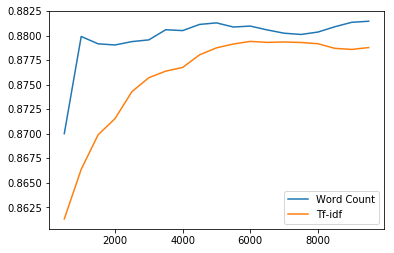

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(possible_n, cnt_accuracies, label='Word Count') 
plt.plot(possible_n, tfidf_accuracies, label='Tf-idf')
plt.legend()

**Expected**:

<img src="plot.png" width="400">

### Save model

In [66]:
best = train_with_n_topwords(3000, tfidf=True) # best = (acc, model, vec)

In [67]:
best

(0.8757174306156145,
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
 TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words=None, strip_accents=None, sublinear_tf=False,
         token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
         vocabulary=['game', 'play', 'get', 'like', 'one', 'time', 'make', 'good', 'great', 'fun', 'go', 'really', 'use', 'character', 'also', 'first', 'graphics', 'even', 'much', 'well', 'take', 'buy', 'level', 'look', 'new', 'would', '2', 'find', 'say', 'story', 'think', 'still', 'best', 'want', 'come', 's...', 'revolve', 'hence', 'rayman', 'nostalgic', 'establish', 'mountains', 'western', 'uncover', 'beg']))

In [68]:
import pickle

# Save vectorizer
with open('tf_vec.pkl', 'wb') as pkl_file:
    pickle.dump(best[2], pkl_file)

In [69]:
with open('mnb_model.pkl', 'wb') as pkl_file:
    pickle.dump(best[1], pkl_file)